In [4]:
import kNN
reload(kNN)

<module 'kNN' from 'kNN.pyc'>

In [9]:
group,labels = kNN.createDataSet()

In [15]:
kNN.classify0([0,0],group,labels,3)

'B'

## 使用k-邻近算法改进约会网站的配对效果

### 1.准备数据：从文本文件中解析数据

加载数据，生成样本矩阵和标签。labels包含元素的个数等于group矩阵的行数：

In [16]:
reload(kNN)
datingDataMat,datingLabels = kNN.file2matrix('datingTestSet2.txt')

查看生成的group和labels:

In [13]:
datingDataMat

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       ..., 
       [  2.65750000e+04,   1.06501020e+01,   8.66627000e-01],
       [  4.81110000e+04,   9.13452800e+00,   7.28045000e-01],
       [  4.37570000e+04,   7.88260100e+00,   1.33244600e+00]])

In [14]:
datingLabels

[3,
 2,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 3,
 1,
 2,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 2,
 3,
 1,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 1,
 2,
 3,
 1,


### 2.分析数据：使用Matplotlib创建散点图

In [18]:
import matplotlib
import matplotlib.pyplot as plt

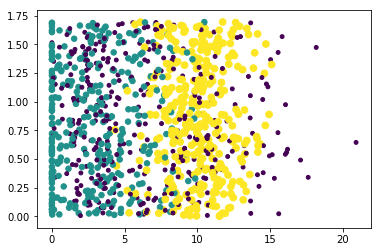

In [24]:
from numpy import *
#创建一幅图
fig = plt.figure()
#返回Axes实例，参数一：子图总行数。参数二：子图总列数。参数三：子图位置
ax = fig.add_subplot(111)
#绘制散点图
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

### 3.准备数据：归一化数值

我们需要在kNN.py中增加一个新函数autoNorm().该函数可以自动将数字特征值转化为0到1之间。

In [26]:
reload(kNN)
normMat,ranges,minVals = kNN.autoNorm(datingDataMat)

查看返回值：

In [28]:
normMat

array([[ 0.44832535,  0.39805139,  0.56233353],
       [ 0.15873259,  0.34195467,  0.98724416],
       [ 0.28542943,  0.06892523,  0.47449629],
       ..., 
       [ 0.29115949,  0.50910294,  0.51079493],
       [ 0.52711097,  0.43665451,  0.4290048 ],
       [ 0.47940793,  0.3768091 ,  0.78571804]])

In [29]:
ranges

array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00])

In [30]:
minVals

array([ 0.      ,  0.      ,  0.001156])

### 4.测试算法：作为完整程序验证分类器

为了测试分类器效果，在kNN.py文件中创建函数datingClassTest

In [35]:
reload(kNN)
kNN.datingClassTest()

the classifier came back with: 3,the real answer is : 3
the classifier came back with: 2,the real answer is : 2
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 3,the real answer is : 3
the classifier came back with: 3,the real answer is : 3
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 3,the real answer is : 3
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 2,the real answer is : 2
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 1,the real answer is : 1
the classifier came back with: 1,the real answer

### 5.使用算法，构建完整可用系统

在kNN.py文件中创建函数classifyPerson:

In [2]:
reload(kNN)
kNN.classifyPerson()

percentage of time spent playing video games?30
frequent flier miles earned per year?39
liters of ice cream consumed per year?39
('You will probably like this person:', 'in large doses')


## 示例：手写识别系统

### 1 准备数据：将图像转换为测试向量

In [9]:
reload(kNN)
testVector=kNN.img2vector('testDigits/0_13.txt')

In [10]:
testVector[0,0:31]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

### 2 测试算法：使用k-近邻算法识别手写数字

在代码中写入函数handwritingClassTest()测试分类器的代码。
写入这些代码之前，确保from os import listdir写入文件的起始部分，这段代码的主要功能是从os模块导入函数listdir.它可以列出给定目录的文件名。

In [13]:
reload(kNN)
kNN.handwritingClassTest()

the classifier came back with: 3,the real answer is : 3

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 2,the real answer is : 2

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 3,the real answer is : 3

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 3,the real answer is : 3

the total number of errors is : 0

the total error rat

the classifier came back with: 8,the real answer is : 8

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 1,the real answer is : 1

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 0,the real answer is : 0

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 8,the real answer is : 8

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 3,the real answer is : 3

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 2,the real answer is : 2

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 0

the total error rat

the classifier came back with: 3,the real answer is : 3

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 3,the real answer is : 3

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 9,the real answer is : 9

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 0,the real answer is : 0

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 9,the real answer is : 9

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 0

the total error rate is : 0.000000
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 0

the total error rat

the classifier came back with: 0,the real answer is : 0

the total number of errors is : 1

the total error rate is : 0.001057
the classifier came back with: 9,the real answer is : 9

the total number of errors is : 1

the total error rate is : 0.001057
the classifier came back with: 3,the real answer is : 3

the total number of errors is : 1

the total error rate is : 0.001057
the classifier came back with: 2,the real answer is : 2

the total number of errors is : 1

the total error rate is : 0.001057
the classifier came back with: 1,the real answer is : 1

the total number of errors is : 1

the total error rate is : 0.001057
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 1

the total error rate is : 0.001057
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 1

the total error rate is : 0.001057
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 1

the total error rat

the classifier came back with: 0,the real answer is : 0

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 8,the real answer is : 8

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 0,the real answer is : 0

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 2,the real answer is : 2

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 9,the real answer is : 9

the total number of errors is : 2

the total error rat

the classifier came back with: 3,the real answer is : 3

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 5,the real answer is : 5

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 8,the real answer is : 8

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 5,the real answer is : 5

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 1,the real answer is : 1

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 2

the total error rat

the classifier came back with: 4,the real answer is : 4

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 3,the real answer is : 3

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 1,the real answer is : 1

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 8,the real answer is : 8

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 8,the real answer is : 8

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 1,the real answer is : 1

the total number of errors is : 2

the total error rate is : 0.002114
the classifier came back with: 5,the real answer is : 5

the total number of errors is : 2

the total error rat

the classifier came back with: 9,the real answer is : 9

the total number of errors is : 6

the total error rate is : 0.006342
the classifier came back with: 3,the real answer is : 3

the total number of errors is : 6

the total error rate is : 0.006342
the classifier came back with: 0,the real answer is : 0

the total number of errors is : 6

the total error rate is : 0.006342
the classifier came back with: 8,the real answer is : 8

the total number of errors is : 6

the total error rate is : 0.006342
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 6

the total error rate is : 0.006342
the classifier came back with: 5,the real answer is : 9

the total number of errors is : 7

the total error rate is : 0.007400
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 7

the total error rate is : 0.007400
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 7

the total error rat

the classifier came back with: 4,the real answer is : 4

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 5,the real answer is : 5

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 5,the real answer is : 5

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 9,the real answer is : 9

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 0,the real answer is : 0

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 9,the real answer is : 9

the total number of errors is : 8

the total error rat

the classifier came back with: 0,the real answer is : 0

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 0,the real answer is : 0

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 2,the real answer is : 2

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 1,the real answer is : 1

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 9,the real answer is : 9

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 0,the real answer is : 0

the total number of errors is : 8

the total error rat

the classifier came back with: 7,the real answer is : 7

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 3,the real answer is : 3

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 3,the real answer is : 3

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 8,the real answer is : 8

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 9,the real answer is : 9

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 8

the total error rat

the classifier came back with: 6,the real answer is : 6

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 8,the real answer is : 8

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 2,the real answer is : 2

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 8,the real answer is : 8

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 5,the real answer is : 5

the total number of errors is : 8

the total error rate is : 0.008457
the classifier came back with: 3,the real answer is : 8

the total number of errors is : 9

the total error rat

the classifier came back with: 0,the real answer is : 0

the total number of errors is : 11

the total error rate is : 0.011628
the classifier came back with: 0,the real answer is : 0

the total number of errors is : 11

the total error rate is : 0.011628
the classifier came back with: 1,the real answer is : 1

the total number of errors is : 11

the total error rate is : 0.011628
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 11

the total error rate is : 0.011628
the classifier came back with: 1,the real answer is : 1

the total number of errors is : 11

the total error rate is : 0.011628
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 11

the total error rate is : 0.011628
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 11

the total error rate is : 0.011628
the classifier came back with: 7,the real answer is : 7

the total number of errors is : 11

the total e

the classifier came back with: 2,the real answer is : 2

the total number of errors is : 12

the total error rate is : 0.012685
the classifier came back with: 1,the real answer is : 1

the total number of errors is : 12

the total error rate is : 0.012685
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 12

the total error rate is : 0.012685
the classifier came back with: 1,the real answer is : 8

the total number of errors is : 13

the total error rate is : 0.013742
the classifier came back with: 6,the real answer is : 6

the total number of errors is : 13

the total error rate is : 0.013742
the classifier came back with: 5,the real answer is : 5

the total number of errors is : 13

the total error rate is : 0.013742
the classifier came back with: 4,the real answer is : 4

the total number of errors is : 13

the total error rate is : 0.013742
the classifier came back with: 1,the real answer is : 1

the total number of errors is : 13

the total e